In [46]:
import pandas as pd

ground_truth_df = pd.read_csv('data/experiment_signal.csv', index_col=0)
ground_truth_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
ground_truth_df.head()


,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.270887,1,118,Breast
1,0.079908,2,118,Breast
2,0.119538,3,118,Breast
3,0.213657,4,118,Breast
4,0.134133,6,118,Breast


In [47]:
import pandas as pd 

experiment_df = pd.read_csv('data/experiment.csv', index_col=0)
experiment_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.127125,0,118,Breast
1,0.035549,1,118,Breast
2,0.146445,4,118,Breast
3,0.015070,16,118,Breast
4,0.675811,44,118,Breast


In [48]:
experiment_sig_profiler_df = pd.read_csv('data/experiment_sig_profiles.csv', index_col=0)
experiment_sig_profiler_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_sig_profiler_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.417946,1,118,Breast
1,0.097403,3,118,Breast
2,0.372491,4,118,Breast
3,0.112161,15,118,Breast
4,0.473168,1,117,Breast


In [49]:
experiment_signal_df = pd.read_csv('data/experiment_signal.csv', index_col=0)
experiment_signal_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_signal_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.270887,1,118,Breast
1,0.079908,2,118,Breast
2,0.119538,3,118,Breast
3,0.213657,4,118,Breast
4,0.134133,6,118,Breast


In [50]:
def calculate_metrics(predicted, actual, total_values):
    predicted_set = set(predicted)
    actual_set = set(actual)
    all_values_set = set(range(total_values))

    true_positives = len(predicted_set.intersection(actual_set))
    true_negatives = len(all_values_set.difference(actual_set).difference(predicted_set))

    false_negatives = actual_set.difference(predicted_set)
    false_positives = predicted_set.difference(actual_set)

    total_positives = len(actual_set)
    total_negatives = total_values - total_positives

    sensitivity = true_positives / total_positives if total_positives else 0
    specificity = true_negatives / total_negatives if total_negatives else 0

    return sensitivity, specificity, false_negatives, false_positives


In [51]:
ground_truth_df['Sample Names'].unique()

array([118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106,
       105, 104, 103, 102, 101, 100,  99,  98,  97,  96,  95,  94,  93,
        92,  91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,
        79,  78,  77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,
        66,  65,  64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,
        53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,
        40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,
        27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,
        14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,
         1,   0])

In [52]:
import pandas as pd

results = []
total_values = 67

for patient in ground_truth_df['Sample Names'].unique():
    try:
        actual = ground_truth_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted = experiment_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_sig_profile = experiment_sig_profiler_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_signal = experiment_signal_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
    except:
        print(f'error: patient', patient)
        continue
    sensitivity, specificity, false_negatives, false_positives = calculate_metrics(predicted, actual, total_values)
    sensitivity_sig_profile, specificity_sig_profile, false_negatives_sig_profile, false_positives_sig_profile = calculate_metrics(predicted_sig_profile, actual, total_values)
    sensitivity_signal, specificity_signal, false_negatives_signal, false_positives_signal = calculate_metrics(predicted_signal, actual, total_values)

    results.append({
        'Pacjent': patient,
        'Sensitivity_our': sensitivity,
        'Specificity_our': specificity,
        'Sensitivity_sig_profile':sensitivity_sig_profile,
        'Specificity_sig_profile':specificity_sig_profile,
        'Sensitivity_signal':sensitivity_signal,
        'Specificity_signal':specificity_signal,
        'false_negatives_our':  {} if len(false_negatives) == 0 else false_negatives,
        'false_positives_our': {} if len(false_positives) == 0 else false_positives,
        'false_negatives_sig_profile':  {} if len(false_negatives_sig_profile) == 0 else false_negatives_sig_profile,
        'false_positives_sig_profile': {} if len(false_positives_sig_profile) == 0 else false_positives_sig_profile,
        'false_negatives_signal':  {} if len(false_negatives_signal) == 0 else false_negatives_signal,
        'false_positives_signal': {} if len(false_positives_signal) == 0 else false_positives_signal
    })

# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results)


In [53]:
results_df['Sensitivity_our'].mean(), results_df['Sensitivity_sig_profile'].mean(), results_df['Sensitivity_signal'].mean()

(0.3217753768173936, 0.635971055088702, 1.0)

In [54]:
results_df['Specificity_our'].mean(), results_df['Specificity_sig_profile'].mean(), results_df['Specificity_signal'].mean()

(0.960224736075061, 0.9953646150862954, 1.0)

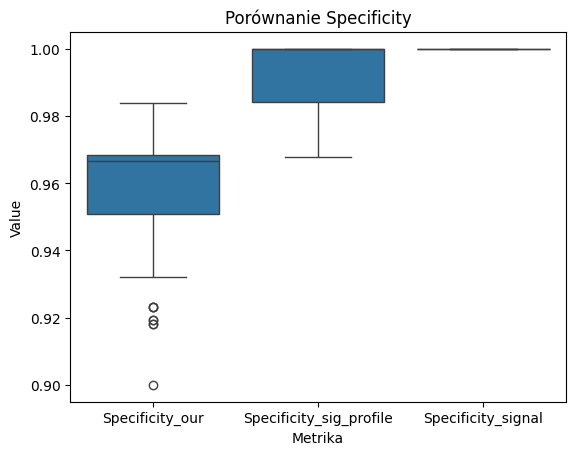

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Specificity_our', 'Specificity_sig_profile', 'Specificity_signal'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Specificity')
plt.xlabel('Metrika')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()

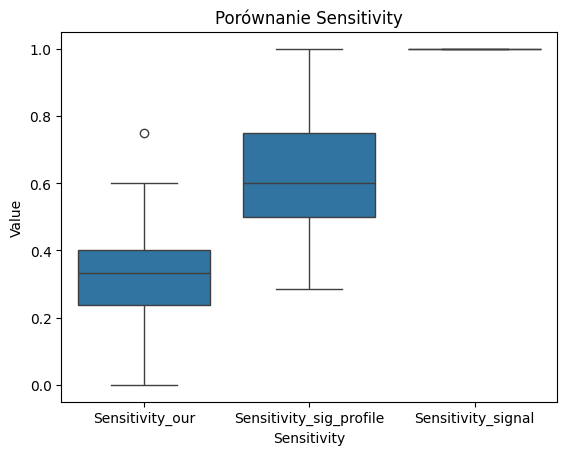

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Sensitivity_our', 'Sensitivity_sig_profile', 'Sensitivity_signal'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Sensitivity')
plt.xlabel('Sensitivity')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()


In [57]:
results_df

,Pacjent,Sensitivity_our,Specificity_our,Sensitivity_sig_profile,Specificity_sig_profile,Sensitivity_signal,Specificity_signal,false_negatives_our,false_positives_our,false_negatives_sig_profile,false_positives_sig_profile,false_negatives_signal,false_positives_signal
0,118,0.333333,0.950820,0.500000,0.983607,1.0,1.0,"{2, 3, 6, 7}","{0, 16, 44}","{2, 6, 7}",{15},{},{}
1,117,0.285714,0.950000,0.428571,1.000000,1.0,1.0,"{2, 5, 7, 13, 15}","{0, 16, 44}","{2, 13, 5, 7}",{},{},{}
2,116,0.166667,0.918033,0.500000,1.000000,1.0,1.0,"{1, 5, 6, 7, 26}","{0, 10, 44, 20, 21}","{26, 5, 7}",{},{},{}
3,115,0.500000,0.936508,0.750000,0.984127,1.0,1.0,"{5, 6}","{0, 16, 2, 44}",{1},{3},{},{}
4,114,0.400000,0.983871,0.800000,1.000000,1.0,1.0,"{3, 5, 6}",{44},{4},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,4,0.500000,0.967213,0.500000,0.983607,1.0,1.0,"{2, 5, 7}","{16, 44}","{0, 1, 7}",{3},{},{}
115,3,0.500000,0.967213,0.500000,0.983607,1.0,1.0,"{2, 5, 7}","{16, 44}","{1, 5, 7}",{3},{},{}
116,2,0.500000,0.967213,0.666667,1.000000,1.0,1.0,"{2, 3, 5}","{16, 44}","{4, 5}",{},{},{}
117,1,0.400000,0.983871,0.600000,0.983871,1.0,1.0,"{2, 5, 7}",{44},"{5, 7}",{3},{},{}


In [61]:
import pandas as pd

signatures_false_negatives_our, signatures_false_positives_our = [], []
signatures_false_negatives_sig_profile, signatures_false_positives_sig_profile = [], []
signatures_false_negatives_signal, signatures_false_positives_signal = [], []

for idx, row in results_df.iterrows():
    for item in row['false_negatives_our']:
      signatures_false_negatives_our.append({'Count': row['Pacjent'], 'signature_false_negatives_our': item})
    for item in row['false_positives_our']:
      signatures_false_positives_our.append({'Count': row['Pacjent'], 'signature_false_positives_our': item})
    
    for item in row['false_negatives_sig_profile']:
      signatures_false_negatives_sig_profile.append({'Count': row['Pacjent'], 'signature_false_negatives_sig_profile': item})
    for item in row['false_positives_sig_profile']:
      signatures_false_positives_sig_profile.append({'Count': row['Pacjent'], 'signature_false_positives_sig_profile': item})

    for item in row['false_negatives_signal']:
      signatures_false_negatives_signal.append({'Count': row['Pacjent'], 'signature_false_negatives_signal': item})
    for item in row['false_positives_signal']:
      signatures_false_positives_signal.append({'Count': row['Pacjent'], 'signature_false_positives_signal': item})


# Teraz możesz wykonać grupowanie na podstawie elementów
grouped_fn_our = pd.DataFrame(signatures_false_negatives_our).groupby('signature_false_negatives_our').count().reset_index()
grouped_fp_our = pd.DataFrame(signatures_false_positives_our).groupby('signature_false_positives_our').count().reset_index()
grouped_fn_sig_profile = pd.DataFrame(signatures_false_negatives_sig_profile).groupby('signature_false_negatives_sig_profile').count().reset_index()
grouped_fp_sig_profile = pd.DataFrame(signatures_false_positives_sig_profile).groupby('signature_false_positives_sig_profile').count().reset_index()

grouped_fn_signal = pd.DataFrame(signatures_false_negatives_signal).groupby('signature_false_negatives_signal').count().reset_index()
grouped_fp_signal = pd.DataFrame(signatures_false_positives_signal).groupby('signature_false_positives_signal').count().reset_index()

KeyError: 'signature_false_negatives_signal'

In [62]:
grouped_fn_our['Count'].sum(), grouped_fn_sig_profile['Count'].sum(), grouped_fn_signal['Count'].sum()
#sygnatura była istotna, a nie jest wykryta

NameError: name 'grouped_fn_signal' is not defined

In [63]:
grouped_fp_our['Count'].sum(), grouped_fp_sig_profile['Count'].sum(), grouped_fp_signal['Count'].sum()
#sygnatura nie była istotna, a jest wykryta

NameError: name 'grouped_fp_signal' is not defined

In [64]:
combined_df_fn = pd.merge(grouped_fn_our, grouped_fn_sig_profile, left_on='signature_false_negatives_our', right_on='signature_false_negatives_sig_profile', how='outer').fillna(0)
combined_df_fn = pd.merge(combined_df_fn, grouped_fn_signal, left_on='signature_false_negatives_our', right_on='signature_false_negatives_signal', how='outer').fillna(0)

NameError: name 'grouped_fn_signal' is not defined

In [20]:
indexes = ['SBS1', 'SBS2', 'SBS3', 'SBS4', 'SBS5', 'SBS6', 'SBS7a', 'SBS7b',
           'SBS7c', 'SBS7d', 'SBS8', 'SBS9', 'SBS10a', 'SBS10b', 'SBS11', 'SBS12',
           'SBS13', 'SBS14', 'SBS15', 'SBS16', 'SBS17a', 'SBS17b', 'SBS18',
           'SBS19', 'SBS20', 'SBS21', 'SBS22', 'SBS23', 'SBS24', 'SBS25', 'SBS26',
           'SBS27', 'SBS28', 'SBS29', 'SBS30', 'SBS31', 'SBS32', 'SBS33', 'SBS34',
           'SBS35', 'SBS36', 'SBS37', 'SBS38', 'SBS39', 'SBS40', 'SBS41', 'SBS42',
           'SBS43', 'SBS44', 'SBS45', 'SBS46', 'SBS47', 'SBS48', 'SBS49', 'SBS50',
           'SBS51', 'SBS52', 'SBS53', 'SBS54', 'SBS55', 'SBS56', 'SBS57', 'SBS58',
           'SBS59', 'SBS60', 'SBS84', 'SBS85']


mapping = {index: name for index, name in enumerate(indexes)}


In [21]:
grouped_fn_our['signatures_cat_our'] = grouped_fn_our['signature_false_negatives_our'].map(mapping)
grouped_fn_signal['signatures_cat_signal'] = grouped_fn_signal['signature_false_negatives_signal'].map(mapping)
grouped_fn_sig_profile['signatures_cat_sig_profile'] = grouped_fn_sig_profile['signature_false_negatives_sig_profile'].map(mapping)


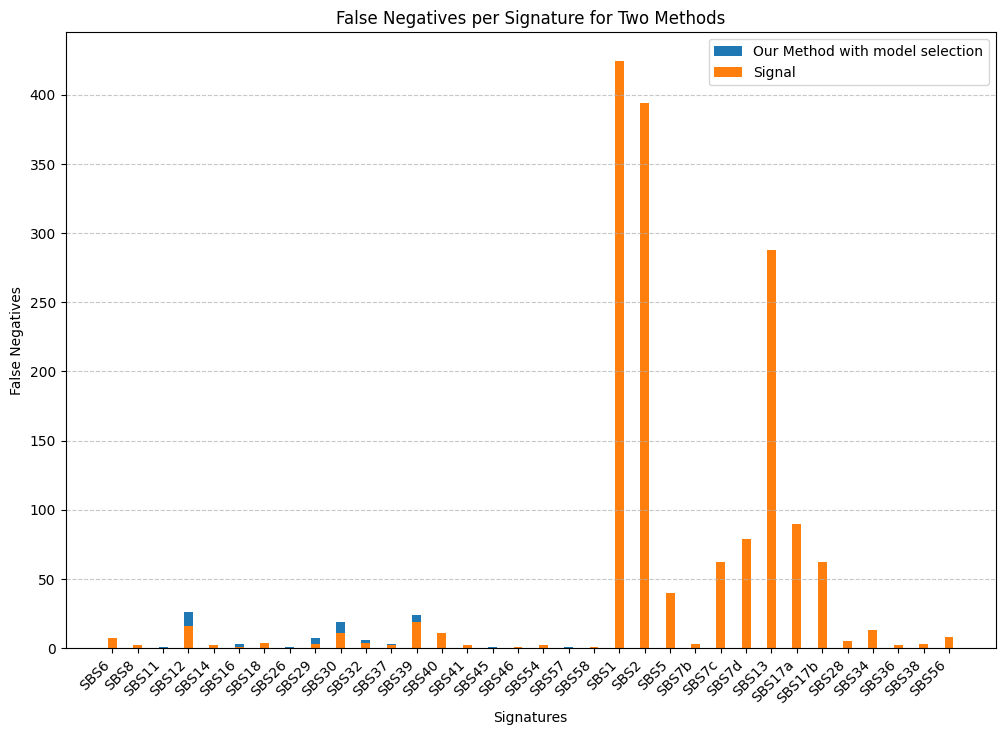

In [22]:
import matplotlib.pyplot as plt

# Twoje wcześniejsze ustawienia i dane
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Rysowanie wykresów słupkowych
bar1 = ax.bar(grouped_fn_our['signatures_cat_our'], grouped_fn_our['Count'], bar_width, label='Our Method with model selection')
#bar2 = ax.bar(combined_df_fn['signature_false_negatives_sig_profile'] + bar_width/2, combined_df_fn['Count_y'], bar_width, label='Sig Profiler Assigment')
bar3 = ax.bar(grouped_fn_signal['signatures_cat_signal'], grouped_fn_signal['Count'], bar_width, label='Signal')

# Ustawienia etykiet i tytułu
ax.set_xlabel('Signatures')
ax.set_ylabel('False Negatives')
ax.set_title('False Negatives per Signature for Two Methods')
ax.legend()
plt.xticks(rotation=45, ha='right')
# Dodanie siatki i wyświetlenie wykresu
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [23]:
grouped_fp_our['signatures_cat_our'] = grouped_fp_our['signature_false_positives_our'].map(mapping)
grouped_fp_signal['signatures_cat_signal'] = grouped_fp_signal['signature_false_positives_signal'].map(mapping)
grouped_fp_sig_profile['signatures_cat_sig_profile'] = grouped_fp_sig_profile['signature_false_positives_sig_profile'].map(mapping)


In [30]:
labels_for_plots = pd.read_csv('data/benchmark_1/WGS_signatures__sigProfiler_SBS_signatures_2019_05_22.modified.csv', sep='\t')

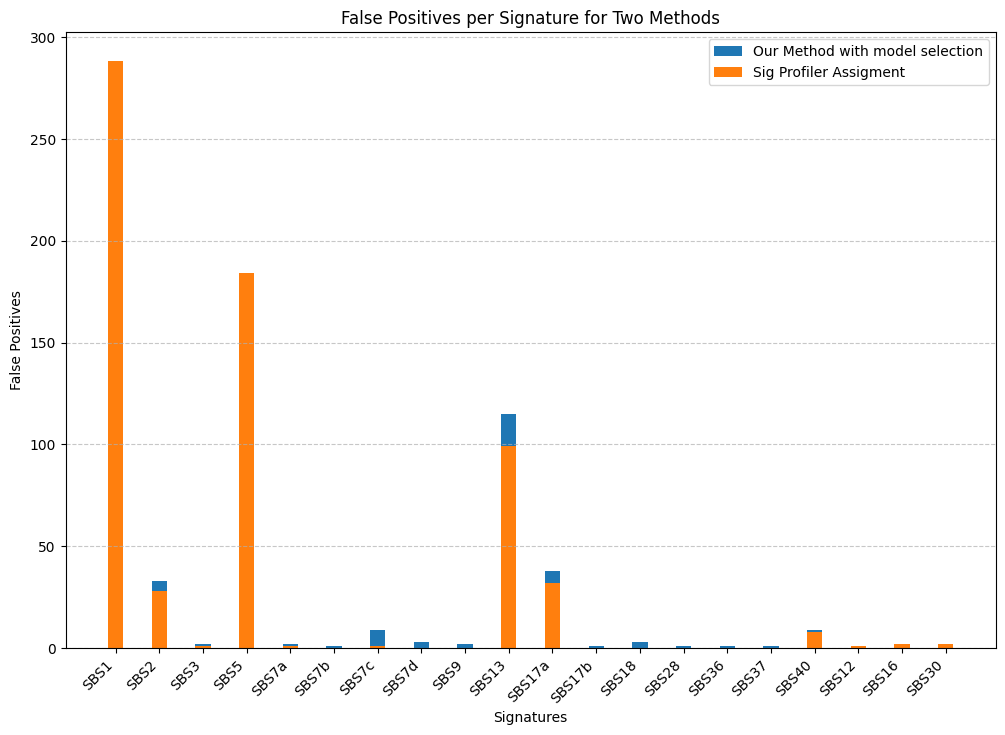

In [31]:
import matplotlib.pyplot as plt

# Twoje wcześniejsze ustawienia i dane
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Rysowanie wykresów słupkowych
bar1 = ax.bar(grouped_fp_our['signatures_cat_our'], grouped_fp_our['Count'], bar_width, label='Our Method with model selection')
bar2 = ax.bar(grouped_fp_sig_profile['signatures_cat_sig_profile'], grouped_fp_sig_profile['Count'], bar_width, label='Sig Profiler Assigment')
#bar3 = ax.bar(combined_df_fp['signature_falsepositive_signal'] + bar_width/2, combined_df_fn['Count'], bar_width, label='Signal')

# Ustawienia etykiet i tytułu
ax.set_xlabel('Signatures')
ax.set_ylabel('False Positives')
ax.set_title('False Positives per Signature for Two Methods')
ax.legend()
plt.xticks(rotation=45, ha='right')

# Dodanie siatki i wyświetlenie wykresu
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [26]:
ground_truth_df

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092256,0,SP95550,Uterus-AdenoCA
1,0.063790,1,SP95550,Uterus-AdenoCA
2,0.158236,4,SP95550,Uterus-AdenoCA
3,0.099229,16,SP95550,Uterus-AdenoCA
4,0.586489,44,SP95550,Uterus-AdenoCA
...,...,...,...,...
10431,0.100450,0,SP117655,Biliary-AdenoCA
10432,0.087002,1,SP117655,Biliary-AdenoCA
10433,0.122098,4,SP117655,Biliary-AdenoCA
10434,0.054098,16,SP117655,Biliary-AdenoCA


In [39]:
import pandas as pd
import numpy as np

# Funkcja do tworzenia wektora dla danej grupy
def create_vector(group):
    vector = np.zeros(67)
    for _, row in group.iterrows():
        index = row['best_columns']
        if index < 67:
            vector[index] = row['findSigExposures']
    return vector

def spearman_correlation(x, y):
    rx = np.argsort(np.argsort(x))
    ry = np.argsort(np.argsort(y))  
    return np.corrcoef(rx, ry)[0, 1]
    

# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = experiment_sig_profiler_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_df.groupby('Sample Names').apply(create_vector)

correlations_our = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_our[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_our = pd.DataFrame(list(correlations_our.items()), columns=['Sample Names', 'Correlation'])

In [40]:
correlations_df_our.describe()

,Sample Names,Correlation
count,119.000000,119.000000
mean,59.000000,0.826092
std,34.496377,0.073733
min,0.000000,0.655439
25%,29.500000,0.752654
50%,59.000000,0.842046
75%,88.500000,0.879759
max,118.000000,0.961569


In [41]:
# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = experiment_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_sig_profiler_df.groupby('Sample Names').apply(create_vector)

correlations_sig_profile = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_sig_profile[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_sig_profile = pd.DataFrame(list(correlations_sig_profile.items()), columns=['Sample Names', 'Correlation'])

In [42]:
correlations_df_sig_profile.describe()

,Sample Names,Correlation
count,119.000000,119.000000
mean,59.000000,0.826092
std,34.496377,0.073733
min,0.000000,0.655439
25%,29.500000,0.752654
50%,59.000000,0.842046
75%,88.500000,0.879759
max,118.000000,0.961569


In [43]:
# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = experiment_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_signal_df.groupby('Sample Names').apply(create_vector)

correlations_signal = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_signal[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_signal = pd.DataFrame(list(correlations_signal.items()), columns=['Sample Names', 'Correlation'])

In [45]:
correlations_df_signal['Correlation'].mean()

0.8116235878979257

In [44]:
correlations_df_our['Correlation'].mean(), correlations_df_signal['Correlation'].mean(), correlations_df_sig_profile['Correlation'].mean()

(0.8260922055788555, 0.8116235878979257, 0.8260922055788555)

In [34]:
import pandas as pd 


def save_to_dataframe(best_columns, findSigExposures, cancer_type, patient):
    """
    Saves the best_columns and findSigExposures to a pandas DataFrame.
    """
    # Create a DataFrame with findSigExposures as a column
    df = pd.DataFrame(findSigExposures, columns=['findSigExposures'])
    # Add the best_columns as another column, ensuring the length matches
    # If best_columns is shorter, pad with None or a default value
    df['best_columns'] = pd.Series(best_columns).reindex(df.index)
    df['Cancer Types'] = cancer_type
    df['Sample Names'] = patient

    return df
import numpy as np

tumorBRCA = np.genfromtxt('data/counts.final.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

#df = pd.read_csv('data/benchmark_1/WGS-decomposition__PCAWG_sigProfiler_SBS_signatures_in_samples.csv')
SigProfilerAssignment = pd.read_csv('output/Assignment_Solution/Activities/Assignment_Solution_Activities.txt',sep='\t')


ground_truth = SigProfilerAssignment.drop(columns=['Samples'])

ground_truth.columns = [x for x in range(0, 28)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), i, 'Breast')
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('data/experiment_sig_profiles.csv')

In [ ]:
SigProfilerAssignment

In [ ]:
pd.read_csv('output/signal.exposures.csv',sep=',')

In [26]:
 pd.read_csv('output/signal.exposures.csv',sep='\t')

,GEL.Breast_common_SBS13,GEL.Breast_common_SBS5,GEL.Breast_common_SBS8,GEL.Breast_common_SBS2,GEL.Breast_common_SBS3,GEL.Breast_common_SBS18,GEL.Breast_common_SBS1,GEL.Breast_common_SBS127,GEL.Breast_common_SBS17,GEL.Breast_rare_SBS44,...,GEL.Breast_rare_SBS4,GEL.Breast_rare_SBS124,GEL.Breast_rare_SBS105,GEL.Breast_rare_SBS31,GEL.Breast_rare_SBS23.114,GEL.Breast_rare_SBS33.114,GEL.Breast_rare_SBS136,GEL.Breast_rare_SBS123,GEL.Breast_rare_SBS114,unassigned
X2,0.000000,367.590221,307.888981,0.000000,140.663262,200.081844,195.712892,0.000000,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0,349.062800
X3,697.580145,0.000000,1298.741508,0.000000,1911.091751,319.256331,0.000000,395.083852,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0,986.246413
X4,444.966444,813.218188,1609.522488,340.765841,1046.741695,485.066156,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0,638.719189
X5,456.758616,224.011894,1301.459059,0.000000,1132.238253,317.169705,0.000000,217.554144,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0,622.808328
X6,580.964310,1099.099907,3265.568130,0.000000,1829.620103,1096.639049,0.000000,1212.661150,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0,849.447352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X116,1172.037052,0.000000,0.000000,334.192068,279.110319,437.401039,683.832590,0.000000,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0,1043.426931
X117,0.000000,336.723920,0.000000,0.000000,236.971286,176.708116,805.780722,0.000000,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0,456.815956
X118,0.000000,410.640596,0.000000,0.000000,161.300445,69.474117,369.740764,88.837244,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,99.434715,0,157.572119
X119,0.000000,298.163527,104.799116,0.000000,260.057935,135.500487,0.000000,138.099592,0.0,0.0,...,0.0,0.0,0,0.0,0,0.0,0.0,0.000000,0,507.483884


In [35]:
import pandas as pd 



import numpy as np

tumorBRCA = np.genfromtxt('data/counts.final.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

#df = pd.read_csv('data/benchmark_1/WGS-decomposition__PCAWG_sigProfiler_SBS_signatures_in_samples.csv')
signalAssignment = pd.read_csv('output/signal.exposures.csv',sep='\t')


ground_truth = signalAssignment.drop(columns=['unassigned'])

ground_truth.columns = [x for x in range(0, 28)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), i, 'Breast')
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('data/experiment_signal.csv')